## Marketing analytics
#### Ex session 1: *Liquid Laundary Exercise*

Scanner panel data about the purchase behavior of 52 households in the liquid laundry detergent
category for an entire year. The data set contains purchases on 348 purchase occasions, at each of
which four major brands (Tide, Wisk, Era and Surf), all 64 ounces in size, were available for purchase
(these four brands accounted for over 90 percent of all purchases).

#### Q1: Import the data with Python & Pandas so that the resulting DataFrame looks like below and stores 1392 valid observations

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('LiquidLaundry.csv')
df

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Set,Choice
0,1,9,11,0.00,4.67,0,0,1,0,0,1,1
1,1,9,11,0.62,4.98,0,0,0,1,0,2,0
2,1,9,11,0.31,5.38,0,0,0,0,1,3,0
3,1,9,11,0.00,4.98,0,0,0,0,0,4,0
4,2,9,29,0.00,4.67,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,347,289,32,0.43,4.22,0,0,0,0,0,4,1
1388,348,289,37,0.00,5.28,0,0,1,0,0,1,0
1389,348,289,37,0.43,4.89,0,0,0,1,0,2,0
1390,348,289,37,0.14,4.92,0,0,0,0,1,3,0


#### Q2: Verify that there are 52 households and 348 purchase occasions with code that produces a table looking like below

In [3]:
pd.DataFrame({'num': [df['Occasion'].nunique(), df['Household'].nunique()]}, ['Occasion','Household'])

,num
Occasion,348
Household,52


#### Q3: Regardless of brand, determine overall average price and percentage of time brands were on feature and on display by writing code that produces a table looking like below

In [4]:
df[['Price','Feature','Display']].describe().round(2).loc['mean':'mean']

,Price,Feature,Display
mean,5.4,0.06,0.1


#### Q4: Create a new column “Brand” reporting a 1-4 number representing the brand relevant for each observation (1=Tide, 2=Wisk, 3=Era, and 4=Surf)

In [5]:
df["Brand"] = 4 - 3*df.Tide - 2*df.Wisk - df.Era
df[['Tide', 'Wisk', 'Era', 'Brand']]

,Tide,Wisk,Era,Brand
0,1,0,0,1
1,0,1,0,2
2,0,0,1,3
3,0,0,0,4
4,1,0,0,1
...,...,...,...,...
1387,0,0,0,4
1388,1,0,0,1
1389,0,1,0,2
1390,0,0,1,3


#### Q5: Compute the market share for each brand in this dataset

In [7]:
df.groupby('Brand')['Brand'].size()

Brand
1    348
2    348
3    348
4    348
Name: Brand, dtype: int64

#### Q6: Compute average price and feature/display frequency, separately for each brand

In [8]:
df.groupby('Brand')[['Price', "Feature", "Display"]].mean().round(2)

,Price,Feature,Display
Brand,,,
1,5.86,0.06,0.14
2,4.65,0.10,0.18
3,5.96,0.03,0.03
4,5.15,0.06,0.04


#### Q7: Plot purchases per week (entire year)

In [9]:
import matplotlib.pyplot as plt

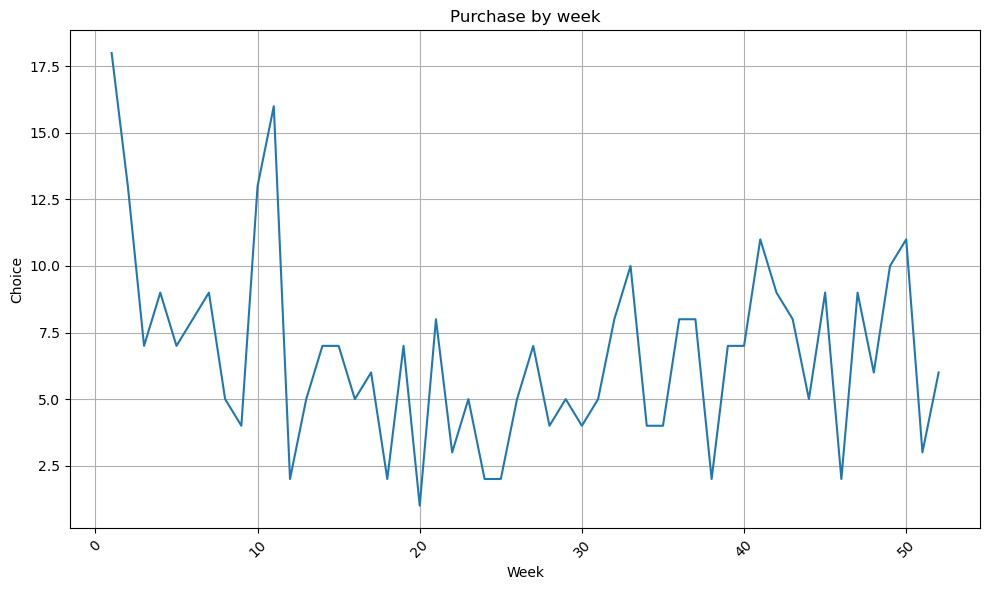

In [17]:
plt.figure(figsize=(10, 6))  
plt.plot(df.groupby('Week')['Choice'].sum().index, df.groupby('Week')['Choice'].sum().values, linestyle='-')
plt.xlabel('Week')  
plt.ylabel('Choice') 
plt.title('Purchase by week')
plt.xticks(rotation=45) 
plt.grid(True) 
plt.tight_layout()

<Axes: xlabel='Week'>

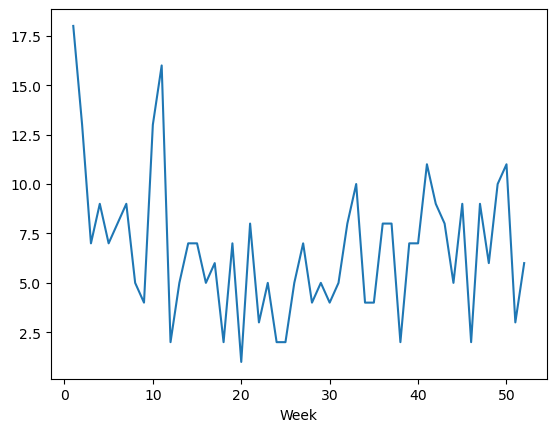

In [18]:
df.groupby('Week')['Choice'].sum().plot()

#### Q8: Find households that are most/least frequent buyers of liquid laundry detergent

In [37]:
counts = df.groupby('Household')['Choice'].sum()
frequent_buyers = counts[counts == counts.max()].index.tolist()
rare_buyers = counts[counts == counts.min()].index.tolist()

print(f"The most frequent buyers of 'Choice' are Household(s): {', '.join(map(str, frequent_buyers))}")
print(f"The least frequent buyers of 'Choice' are Household(s): {', '.join(map(str, rare_buyers))}")

The most frequent buyers of 'Choice' are Household(s): 208, 269
The least frequent buyers of 'Choice' are Household(s): 43, 113, 130, 132, 157, 160, 164, 168, 179, 239, 252, 256, 289


#### Q9: Do low prices increase the likelihood of purchase? Could this data help answer this question? Experiment with approaches (including graphical) to validate this hypothesis based on this dataset

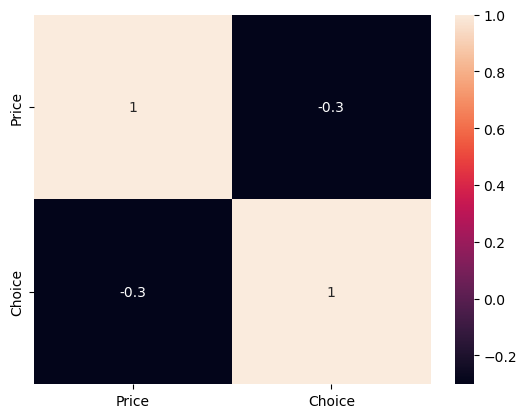

In [38]:
import seaborn as sn

corr_matrix = df[["Price", "Choice"]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [39]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
stats.pointbiserialr(df["Price"], df["Choice"])

SignificanceResult(statistic=-0.30157859425786276, pvalue=1.1654866272424217e-30)

In [47]:
X = df[["Price"]]
y = df["Choice"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [49]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [52]:
print(logreg.coef_)
print(logreg.intercept_)

[[-0.99599531]]
[4.11915567]


In [53]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.508092
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 1044
Model:                          Logit   Df Residuals:                     1042
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Oct 2023   Pseudo R-squ.:                  0.1015
Time:                        18:38:48   Log-Likelihood:                -530.45
converged:                       True   LL-Null:                       -590.35
Covariance Type:            nonrobust   LLR p-value:                 6.980e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1729      0.529      7.894      0.000       3.137       5.209
Price         -1.0066      0.

#### Q10: Think of an additional interesting marketing question of your own that could be answered with this dataset and explain how you would proceed